<a href="https://colab.research.google.com/github/Leirerl/Algoritmos-de-Optimizacion/blob/master/Copy_of_Algoritmos_AG4_plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG4 - Actividad Guiada 4
Nombre: Leire Rodriguez Lizarralde <br>
Link:   https://colab.research.google.com/drive/1nPhEp2FjkYarlYYyYm5kSD7Tyy6De-qm <br>
Github: https://github.com/Leirerl/Algoritmos-de-Optimizacion

<br>


#Carga de librerias

In [1]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [4]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



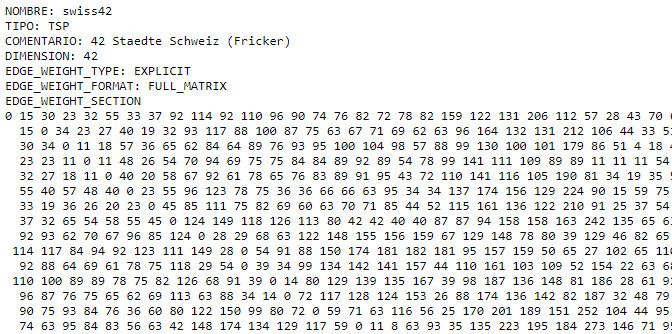

In [5]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [6]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 23, 35, 40, 15, 28, 9, 12, 1, 4, 7, 21, 10, 39, 6, 32, 41, 24, 22, 33, 25, 19, 2, 16, 38, 11, 17, 31, 8, 37, 18, 34, 5, 20, 27, 36, 30, 13, 26, 14, 3, 29]
5290


#BUSQUEDA ALEATORIA

In [7]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 8, 23, 39, 21, 40, 27, 30, 22, 25, 5, 6, 17, 38, 18, 16, 36, 35, 14, 11, 2, 28, 29, 31, 20, 24, 7, 34, 3, 32, 10, 12, 19, 26, 13, 15, 37, 1, 4, 33, 9, 41]
Distancia     : 3677


#BUSQUEDA LOCAL

In [8]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3677
Distancia Mejor Solucion Local: 3330


In [9]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  27 , la mejor solución encontrada es: [0, 8, 9, 39, 21, 40, 24, 38, 22, 25, 11, 12, 14, 16, 15, 37, 36, 35, 31, 17, 7, 1, 27, 2, 28, 29, 30, 34, 33, 20, 32, 3, 4, 6, 5, 19, 13, 26, 18, 10, 41, 23]
Distancia     : 1764


*   ¿Se puede mejorar con otros operadores de vecindad variables?

In [15]:
import random

def distancia_total(solucion, problem):
    """Calcula la distancia total de un recorrido."""
    return sum(problem[solucion[i-1]][solucion[i]] for i in range(len(solucion)))

def genera_vecina_2opt(solucion):
    """Operador de vecindad 2-opt: Intercambia dos nodos y genera una nueva solución."""
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)

    for i in range(1, len(solucion) - 1):
        for j in range(i + 1, len(solucion)):
            vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
            distancia_vecina = distancia_total(vecina, problem)

            if distancia_vecina < mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina
    return mejor_solucion

def genera_vecina_swap(solucion):
    """Operador de vecindad Swap: Intercambia dos nodos en cualquier posición."""
    i, j = random.sample(range(len(solucion)), 2)
    solucion[i], solucion[j] = solucion[j], solucion[i]
    return solucion

def genera_vecina_insert(solucion):
    """Operador de vecindad Insert: Mueve un nodo a otra posición."""
    i, j = random.sample(range(len(solucion)), 2)
    nodo = solucion.pop(i)
    solucion.insert(j, nodo)
    return solucion

def busqueda_local_vns(solucion, problem):
    """Búsqueda Local con Vecindad Variable (VNS)"""
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    operadores = [genera_vecina_2opt, genera_vecina_swap, genera_vecina_insert]

    iteracion = 0
    while True:
        iteracion += 1
        mejora = False

        for operador in operadores:
            nueva_solucion = operador(mejor_solucion[:])
            nueva_distancia = distancia_total(nueva_solucion, problem)

            if nueva_distancia < mejor_distancia:
                mejor_solucion = nueva_solucion
                mejor_distancia = nueva_distancia
                mejora = True
                break  # Reiniciamos la búsqueda con la mejor solución encontrada

        if not mejora:
            print(f"Iteración {iteracion}: Mejor solución encontrada: {mejor_distancia}")
            return mejor_solucion

# Prueba del algoritmo
solucion_inicial = [i for i in range(1, 52)]  # Ejemplo con 51 nodos
random.shuffle(solucion_inicial)
problem = [[random.randint(10, 100) for _ in range(52)] for _ in range(52)]  # Matriz de costos aleatoria

solucion_final = busqueda_local_vns(solucion_inicial, problem)
print("Solución final:", solucion_final)
print("Distancia óptima:", distancia_total(solucion_final, problem))


Iteración 26: Mejor solución encontrada: 963
Solución final: [51, 3, 41, 50, 12, 11, 19, 14, 16, 38, 35, 7, 39, 25, 30, 34, 8, 23, 21, 26, 10, 49, 17, 40, 13, 44, 36, 22, 43, 6, 4, 47, 24, 15, 2, 18, 9, 27, 48, 42, 1, 45, 20, 28, 33, 32, 31, 5, 46, 37, 29]
Distancia óptima: 963


#SIMULATED ANNEALING


In [10]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [11]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 8, 9, 41, 23, 39, 21, 10, 25, 11, 13, 19, 15, 17, 35, 36, 20, 33, 38, 22, 24, 40, 12, 18, 26, 4, 6, 2, 3, 27, 5, 16, 14, 7, 31, 37, 1, 34, 32, 30, 29, 28]
con una distancia total de 2082


*    ¿Se puede mejorar con otra elección no tan aleatoria "función genera_vecina_aleatorio()?

In [16]:
import random
import math

def genera_vecina_mejorada(solucion, problem):
    """Generador de soluciones vecinas basado en 2-opt con heurística mejorada."""
    mejor_vecina = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)

    # Generamos varias soluciones vecinas y elegimos la mejor
    for _ in range(5):  # Se pueden generar más para una mejor exploración
        i, j = sorted(random.sample(range(1, len(solucion)), 2))
        vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_distancia = distancia_vecina
            mejor_vecina = vecina

    return mejor_vecina

def recocido_simulado_mejorado(problem, TEMPERATURA):
    """Recocido simulado con generación de vecinas mejorada."""
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)

    mejor_solucion = solucion_referencia[:]
    mejor_distancia = distancia_referencia

    while TEMPERATURA > 0.0001:
        vecina = genera_vecina_mejorada(solucion_referencia, problem)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina[:]
            mejor_distancia = distancia_vecina

        if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina)):
            solucion_referencia = vecina[:]
            distancia_referencia = distancia_vecina

        TEMPERATURA = bajar_temperatura(TEMPERATURA)

    print("Mejor solución encontrada:", mejor_solucion)
    print("Distancia total:", mejor_distancia)
    return mejor_solucion

# Ejecutamos la versión mejorada
sol = recocido_simulado_mejorado(problem, 10000000)


Mejor solución encontrada: [0, 31, 33, 12, 11, 2, 18, 41, 24, 15, 10, 28, 6, 4, 14, 16, 3, 8, 36, 37, 29, 19, 32, 7, 34, 40, 5, 21, 26, 9, 39, 27, 13, 22, 30, 17, 20, 38, 35, 25, 23, 1]
Distancia total: 822


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


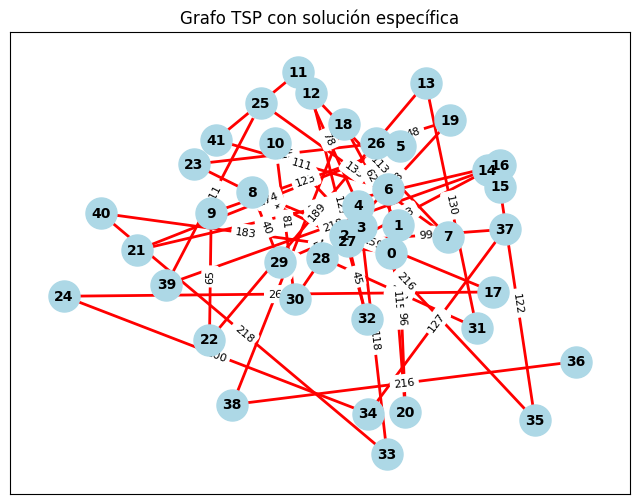

In [13]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

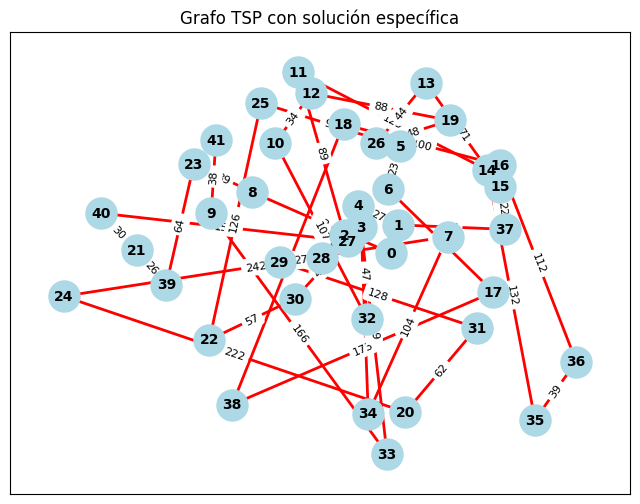

In [14]:
plot_tsp_solution(problem.edge_weights, solucion)